In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

In [6]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [8]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [9]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,one review mention watch oz episod hook right ...,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [10]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [11]:
#Create a BOW Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()


In [12]:
x.shape


(1000, 12331)

In [14]:
len(cv.get_feature_names_out())

12331

In [15]:
y=data.iloc[:1000,1].values
y

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negati

In [16]:
x.shape

(1000, 12331)

In [17]:
y.shape

(1000,)

In [18]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

#model build
from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()
#training
print('='*70)
print('Training started....  ')
gauss_clf.fit(xtrain,ytrain)
print('\ntesting in progress....')
ypred=gauss_clf.predict(xtest)
print('Predicted class:\n',ypred)
print('='*70)

#Performance Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print('='*70)
print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('='*70)
print('Classification report:\n',classification_report(ytest,ypred))
print('='*70)

Training started....  

testing in progress....
Predicted class:
 ['negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negati

<Axes: >

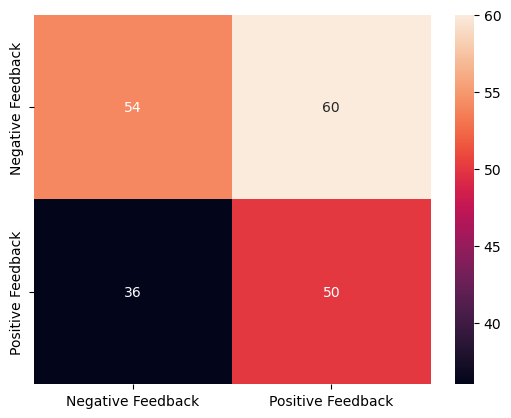

In [19]:
import seaborn as sns

cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])